# Análise Cafelura

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot as aplot#biblioteca utilizada para fazer estudos de correlação
sns.set_palette('pastel')#deixando o gráfico com paleta de cores
sns.set_style('whitegrid')
print('Bibliotecas importadas com sucesso')

Bibliotecas importadas com sucesso


In [12]:
def plotar(titulo,labelx,labely,x,y,dataset):#definindo uma função para facilitar o trabalho
        sns.set_palette('Accent')#deixando o gráfico com paleta de cores
        sns.set_style('darkgrid')#adicionando grade
        ax = sns.lineplot(x=x,y=y,data=dataset)
        ax.figure.set_size_inches(12,6)#aumentando o tamanho, interessante que quando falamos da figura, precisamos do .figure
        ax.set_title(titulo, loc = 'left',fontsize=18)#adicionando titulo
        ax.set_xlabel(labelx,fontsize=14)#adicionando titulo eixo x
        ax.set_ylabel(labely,fontsize=14)#adicionando titulo eixo y
        ax = ax#dessa maneira removemos uma linha que fica em cima com dados da memória
def plot_comp(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)
    ax = ax
def analise_geral(x,y1,y2,y3,dados,titulo):
    dados[y2] = dados[y1].diff()
    dados[y3] = dados[y2].diff()
    plot_comp(x,y1,y2,y3,dados,titulo)

In [3]:
cafelura = pd.read_csv('dados/cafelura.csv',sep=',')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [4]:
cafelura.isna().sum()

mes       0
vendas    0
dtype: int64

In [5]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
cafelura['mes'] =pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [7]:
#analise_geral('mes','vendas','var','acel',cafelura,'Analise de vendas cafelura')

In [8]:
d_fds=pd.read_csv('dados/dias_final_de_semana.csv',sep=',')
d_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [9]:
d_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [11]:
cafelura['vendas normalizadas'] = cafelura['vendas']/d_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


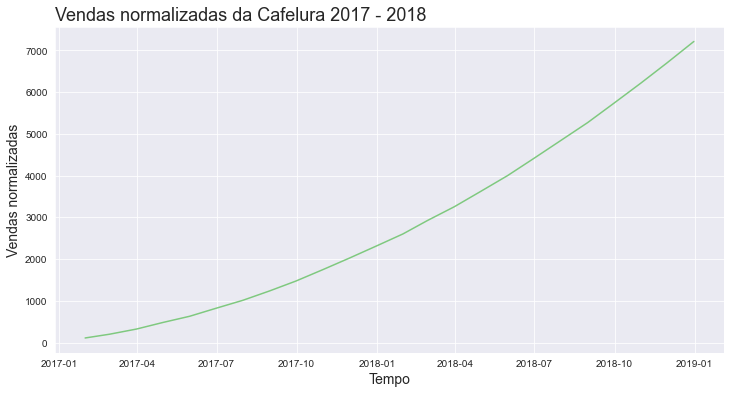

In [13]:
plotar('Vendas normalizadas da Cafelura 2017 - 2018','Tempo','Vendas normalizadas','mes','vendas normalizadas',cafelura)

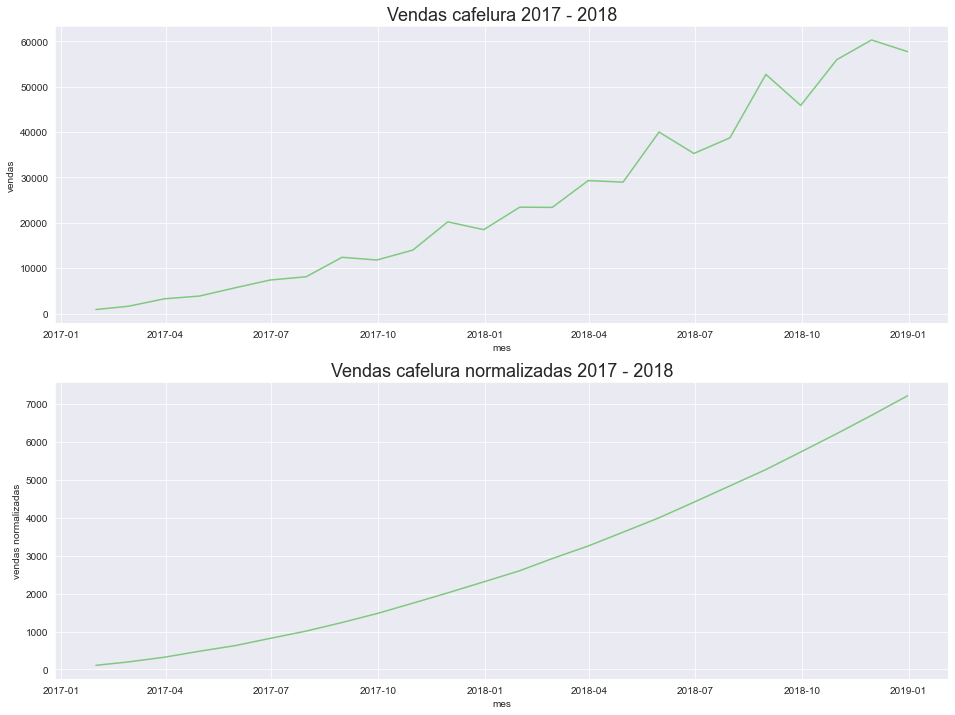

In [16]:
plt.figure(figsize = (16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas cafelura 2017 - 2018',fontsize=18)
sns.lineplot(x='mes',y='vendas',data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas cafelura normalizadas 2017 - 2018',fontsize=18)
sns.lineplot(x='mes',y='vendas normalizadas',data=cafelura)
ax = ax

# statsmodels

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose as sea_dec

In [18]:
resultado = sea_dec([chocolura['vendas']],freq=1)
ax = resultado.plot()

NameError: name 'chocolura' is not defined